In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# For getting the colour map
import matplotlib.cm as cm

#For clustering and creating dendogram
from scipy.cluster.hierarchy import dendrogram, linkage

# For labels of the dendogram plot
import pylab

# for scatter matrix of numerical variables
from pandas.plotting import scatter_matrix

lending_club = pd.read_csv('/Users/r1divya/Documents/AI&MachineLearning/Course1/EDA_Case_study/loan.csv') 

/Users/r1divya/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
# Helper functions to do analysis of numeric variable.
def do_analysis(dataframe, column_name):
    print(dataframe[column_name].describe(percentiles=np.linspace(0,1,11)))
    print("Number of null values for the column {0} : {1}".format(column_name, dataframe[column_name].isnull().sum()))
    plt.figure(figsize=(10,10))
    plt.subplot(311)
    dataframe[column_name].plot(kind='hist', bins=50)
    plt.subplot(312)
    dataframe[column_name].plot(kind='box')
    dataframe[[column_name, 'loan_status']].boxplot(by='loan_status')


In [13]:
# Helper function to print the analysis of categorical variables
def do_analysis_categorical(dataframe, column_name):
    print(dataframe[column_name].value_counts())
    # Segmented Univariate Analysis
    pivot = pd.pivot_table(lending_club, values = 'policy_code',
                         index = [column_name], columns = ['loan_status'], aggfunc = np.sum, margins=True)
    pivot.fillna(0)
    print(pivot)
    # todo: find a way to find percentages in the pivot table
    #print(pivot[['Charged Off', 'Fully Paid']].div(pivot[[ 'All', 'All']]))
    # Segmented Univariate Analysis
    pd.pivot_table(lending_club, values = 'policy_code', index = [column_name],
               columns = ['loan_status'], aggfunc = np.sum).plot(kind='bar', stacked=True, figsize=(24, 8))

In [20]:
# Helper function to run a t test between charged_off and fully paid population.
def run_t_test(dataframe, column_name):
    charged_off = dataframe.loc[dataframe['loan_status'] == 'Charged Off']
    fully_paid = dataframe.loc[dataframe['loan_status'] == 'Fully Paid']
    print(ttest_ind(charged_off[column_name], fully_paid[column_name]))
    

In [21]:
lending_club_current = lending_club.loc[lending_club['loan_status'] == 'Current']
lending_club = lending_club.loc[lending_club['loan_status'] != 'Current']


count    38577.000000
mean         4.808668
std          3.598645
min          0.000000
0%           0.000000
10%          0.000000
20%          1.000000
30.0%        2.000000
40%          3.000000
50%          4.000000
60.0%        5.000000
70%          7.000000
80%         10.000000
90%         10.000000
100%        10.000000
max         10.000000
Name: emp_length, dtype: float64
Number of null values for the column emp_length : 0


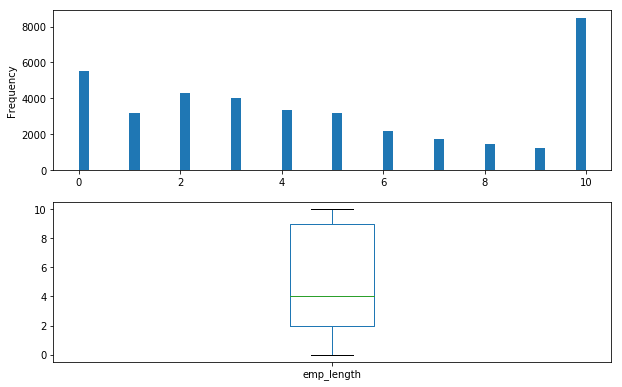

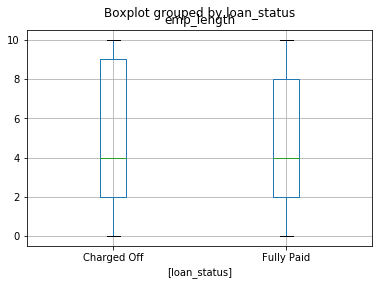

In [22]:
#lending_club['emp_length']=lending_club.emp_length.apply(pd.to_numeric)
lending_club.emp_length.fillna('0',inplace=True)
lending_club['emp_length']=lending_club['emp_length'].apply(lambda x: str(x).split("year")[0].strip().split("+")[0]).apply(lambda x: 0 if str(x).find("<") >=0 else x)
lending_club['emp_length']=lending_club.emp_length.apply(pd.to_numeric)
#print(np.dtype(lending_club.emp_length))
do_analysis(lending_club, 'emp_length')
#lending_club['emp_length']

In [23]:
Insights from frequency-Rank distribution
    1. There is peak in number of loans given to 10+ years exp & less than 1 year exp.
Insights from box-plot
    1. higher number of defaulters lie in 4 to 9 years exp range.
    2. higher number of fully paid customers lie in 4 to 8 years exp.

SyntaxError: invalid syntax (<ipython-input-23-d763962feef6>, line 1)

In [24]:
lending_club['emp_length']=lending_club['emp_length'].astype(str)
lending_club['emp_length']=lending_club['emp_length'].apply(lambda x: x+"years")
lending_club['emp_length']

0        10years
1         0years
2        10years
3        10years
5         3years
6         8years
7         9years
8         4years
9         0years
10        5years
11       10years
12        0years
13        3years
14        3years
15        0years
16        4years
17       10years
18        1years
19        6years
20        3years
21       10years
22       10years
23        5years
24        1years
25        2years
26        9years
27        2years
28       10years
29        0years
30        7years
          ...   
39687     9years
39688     6years
39689     0years
39690     3years
39691     1years
39692     1years
39693     0years
39694     8years
39695     7years
39696     2years
39697     0years
39698     1years
39699     4years
39700     0years
39701     7years
39702     1years
39703     2years
39704     0years
39705     8years
39706     0years
39707     2years
39708     4years
39709     0years
39710     1years
39711     5years
39712     4years
39713     3years
39714     0yea

In [25]:
#Bivariate analysis:
def myfunc(x):
    if (x == '1years') or  (x == '2years') or (x == '3years') or  (x == '0years'):
        return '0-3 years'
    elif x == '4years' or  x == '5years' or  x == '6years' or x == '7years':
        return '4-7 years'
    elif x == '8years' or x == '9years' or x == '10years':
        return '8-10> years'


#    Emp_length vs loan amount???
lending_club['emp_length']=lending_club['emp_length'].astype(str)
#lending_club['emp_length']=lending_club['emp_length'].apply(lambda x: x+" years")
lending_club['emp_length']=lending_club['emp_length'].apply(lambda x: myfunc(x))
lending_club['emp_length']    

0        8-10> years
1          0-3 years
2        8-10> years
3        8-10> years
5          0-3 years
6        8-10> years
7        8-10> years
8          4-7 years
9          0-3 years
10         4-7 years
11       8-10> years
12         0-3 years
13         0-3 years
14         0-3 years
15         0-3 years
16         4-7 years
17       8-10> years
18         0-3 years
19         4-7 years
20         0-3 years
21       8-10> years
22       8-10> years
23         4-7 years
24         0-3 years
25         0-3 years
26       8-10> years
27         0-3 years
28       8-10> years
29         0-3 years
30         4-7 years
            ...     
39687    8-10> years
39688      4-7 years
39689      0-3 years
39690      0-3 years
39691      0-3 years
39692      0-3 years
39693      0-3 years
39694    8-10> years
39695      4-7 years
39696      0-3 years
39697      0-3 years
39698      0-3 years
39699      4-7 years
39700      0-3 years
39701      4-7 years
39702      0-3 years
39703      0-

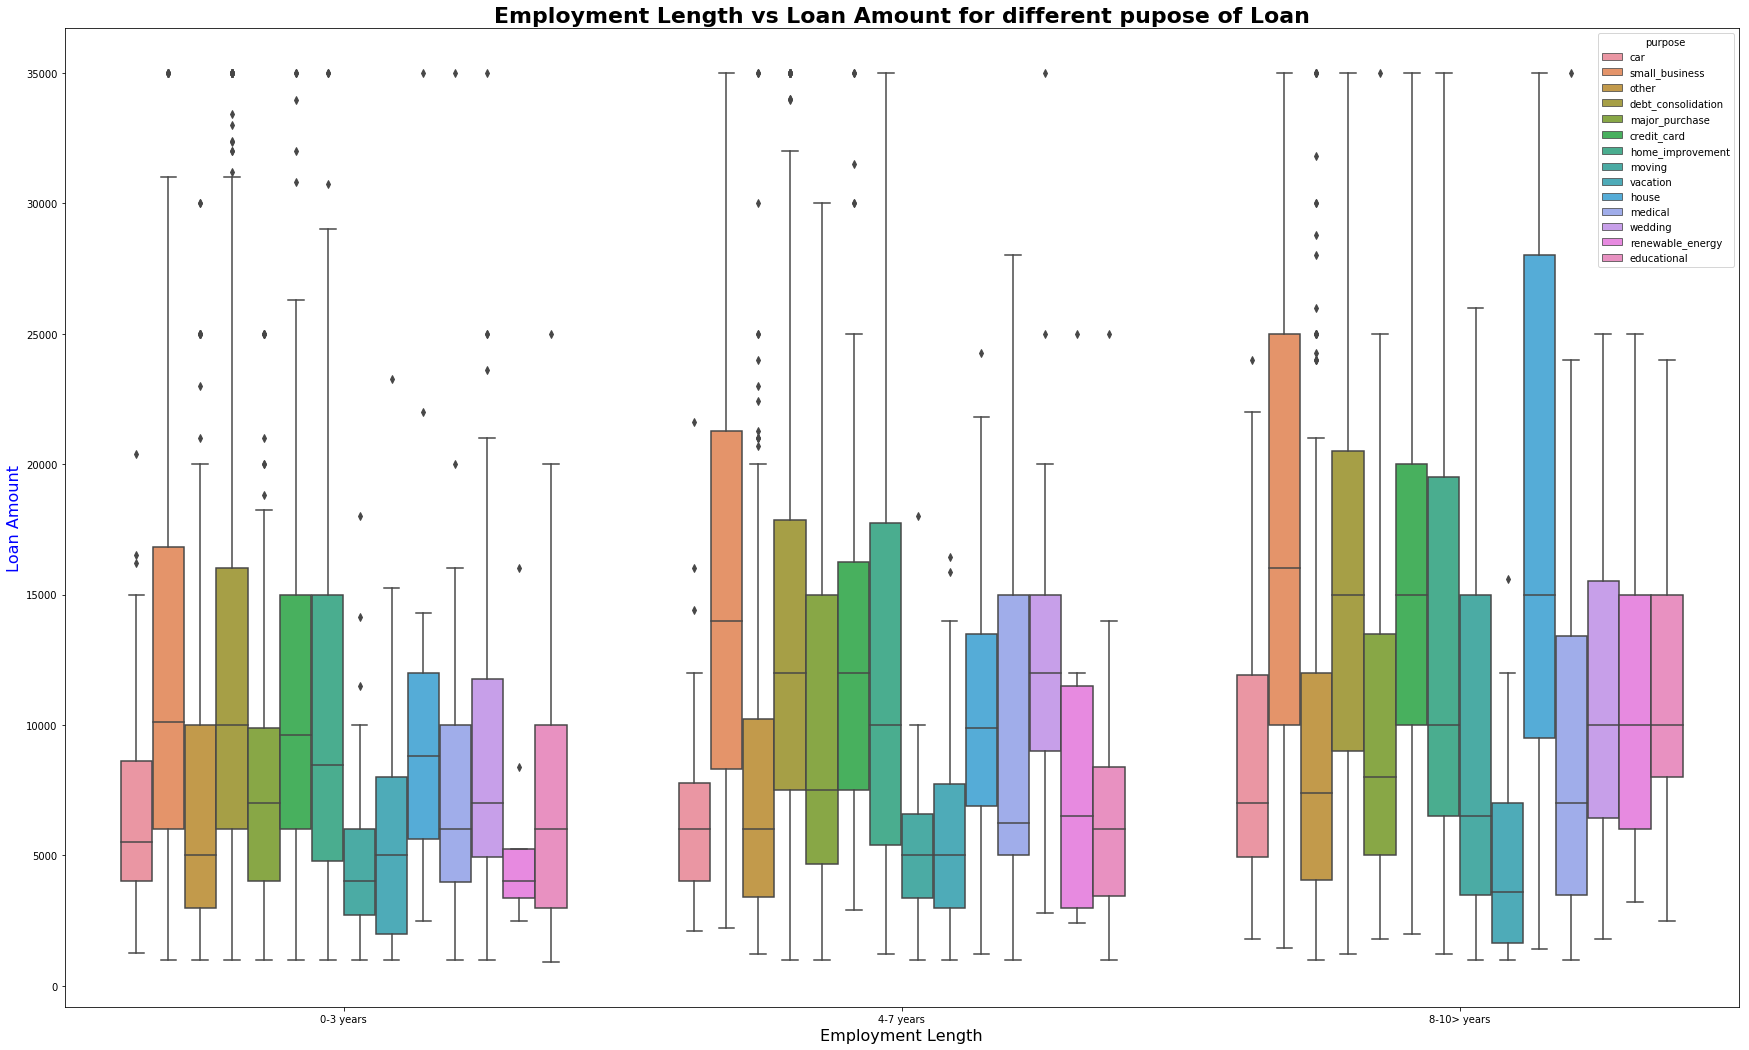

In [26]:

loanstatus=lending_club.loc[lending_club['loan_status']=='Charged Off']
ax = plt.figure(figsize=(30, 18))
ax = sns.boxplot(x='emp_length',y='loan_amnt',hue='purpose',data=loanstatus)
ax.set_title('Employment Length vs Loan Amount for different pupose of Loan',fontsize=22,weight="bold")
ax.set_xlabel('Employment Length',fontsize=16)
ax.set_ylabel('Loan Amount',color = 'b',fontsize=16)
plt.show()

In [ ]:
Insights for ChargedOff loans :
    1. Loan amount for car is high in all the 3 emp length sections 
    2. In 8-10> years category loan has availed for house followed by car.

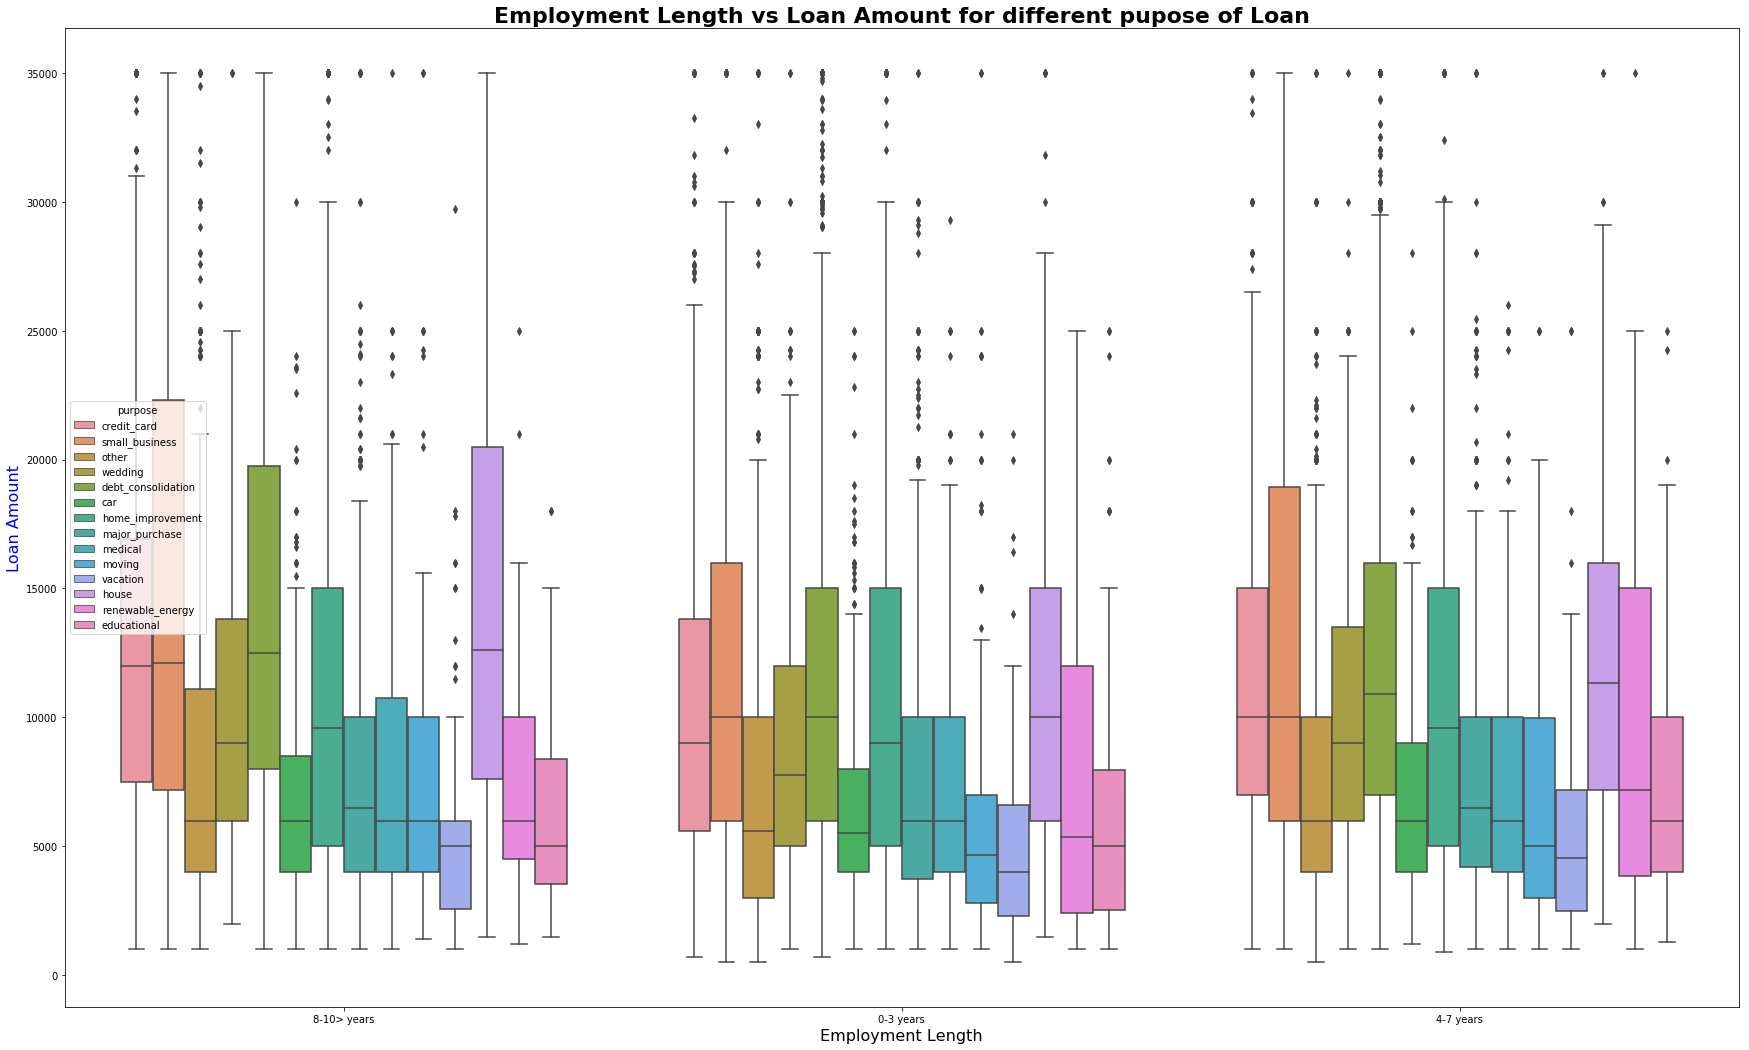

In [27]:
loanstatus1=lending_club.loc[lending_club['loan_status']=='Fully Paid']
ax = plt.figure(figsize=(30, 18))
ax = sns.boxplot(x='emp_length',y='loan_amnt',hue='purpose',data=loanstatus1)
ax.set_title('Employment Length vs Loan Amount for different pupose of Loan',fontsize=22,weight="bold")
ax.set_xlabel('Employment Length',fontsize=16)
ax.set_ylabel('Loan Amount',color = 'b',fontsize=16)
plt.show()

In [ ]:
Insights for Fully Paid loans :
    1. Loan amount for car & house is high in all the 3 emp length sections 
    2. In 8-10> years category loan has availed for car followed by house.

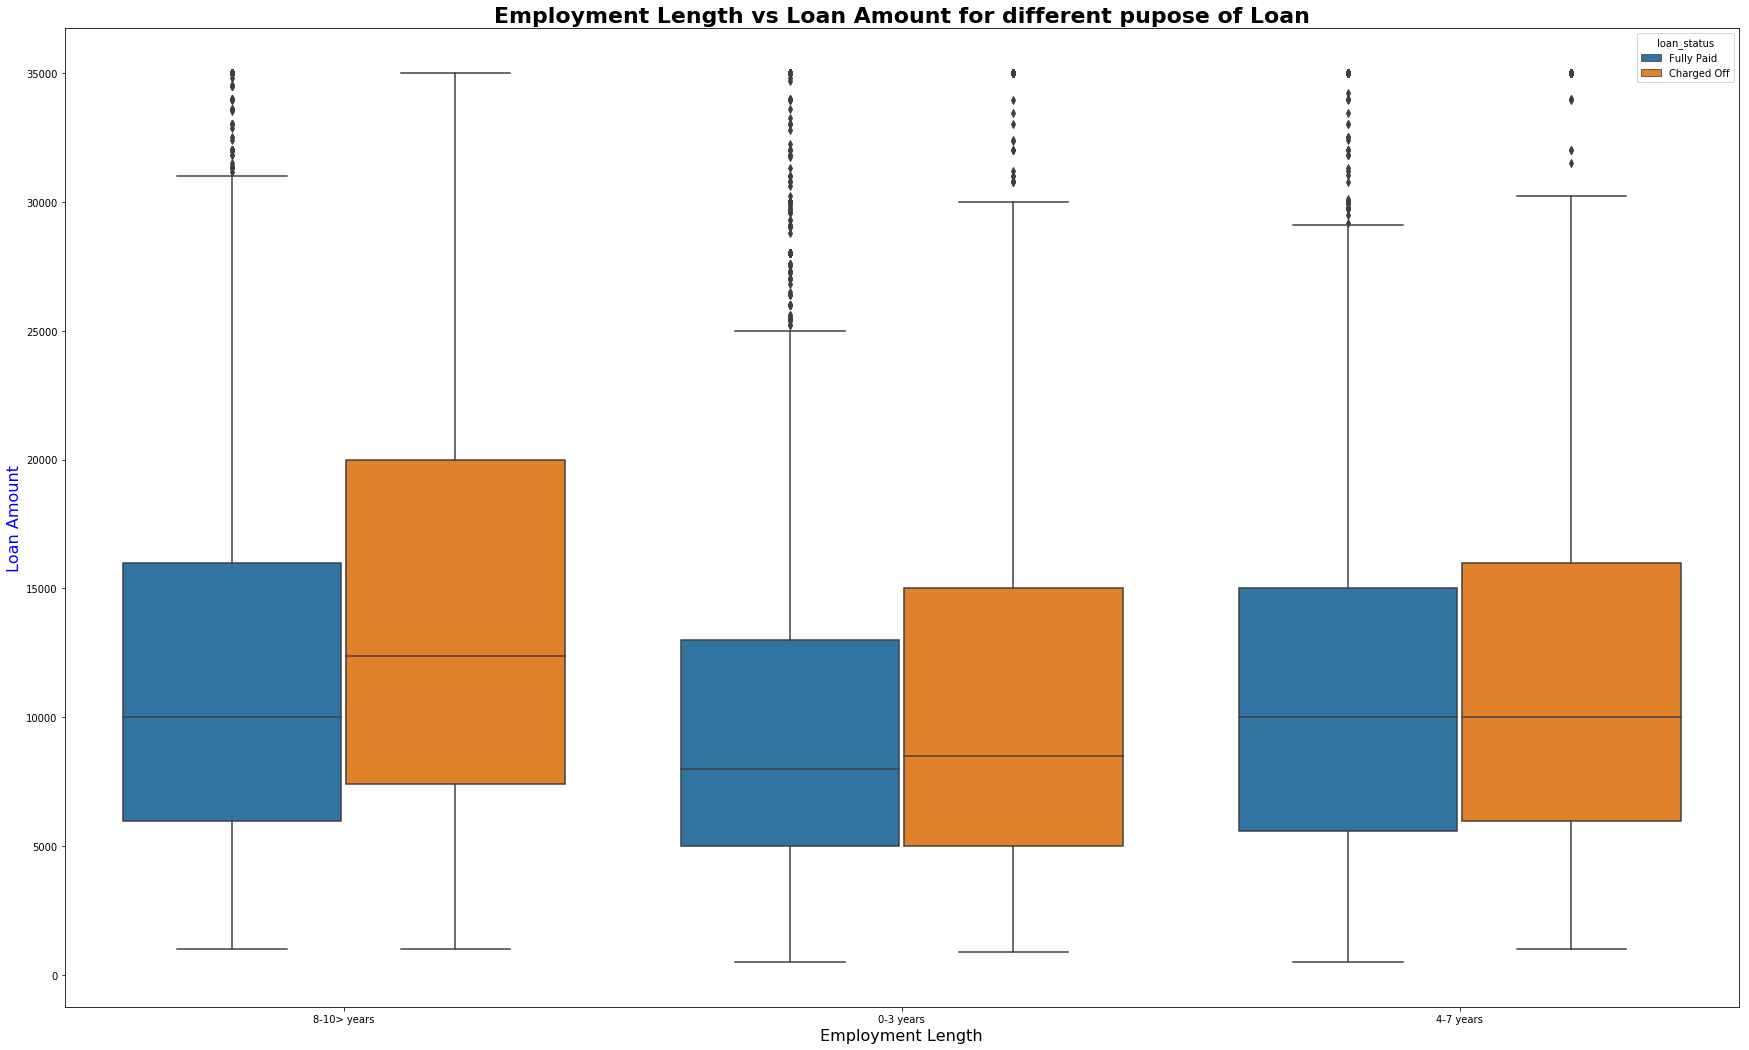

In [28]:
#loanstatus1=lending_club.loc[lending_club['loan_status']=='Fully Paid']
ax = plt.figure(figsize=(30, 18))
ax = sns.boxplot(x='emp_length',y='loan_amnt',hue='loan_status',data=lending_club)
ax.set_title('Employment Length vs Loan Amount for different pupose of Loan',fontsize=22,weight="bold")
ax.set_xlabel('Employment Length',fontsize=16)
ax.set_ylabel('Loan Amount',color = 'b',fontsize=16)
plt.show()

In [ ]:
Insights:
    1. for the 8-10 years category : median of Fully paid loan amount is less compared to median of Charged Off : implies may have to keep the median around 10000 for 8-10> years group
    2. for the 0-3 years category : median for both fully paid and charged off are almost the same. however,the above 25% quar
    3. for 4-7 years the median for both fully paid and charged off are the same .
        

In [29]:
#====================issue_d============
#As it is issue_d will not give any insights need to used to dervie month and year .
lending_club['issue_d']
lending_club['issue_month']=lending_club['issue_d'].apply(lambda x:x.split('-')[0])
lending_club['issue_year']=lending_club['issue_d'].apply(lambda x:x.split('-')[1])
lending_club['issue_year'].apply(pd.to_numeric)

0        11
1        11
2        11
3        11
5        11
6        11
7        11
8        11
9        11
10       11
11       11
12       11
13       11
14       11
15       11
16       11
17       11
18       11
19       11
20       11
21       11
22       11
23       11
24       11
25       11
26       11
27       11
28       11
29       11
30       11
         ..
39687     7
39688     7
39689     7
39690     7
39691     7
39692     7
39693     7
39694     7
39695     7
39696     7
39697     7
39698     7
39699     7
39700     7
39701     7
39702     7
39703     7
39704     7
39705     7
39706     7
39707     7
39708     7
39709     7
39710     7
39711     7
39712     7
39713     7
39714     7
39715     7
39716     7
Name: issue_year, Length: 38577, dtype: int64

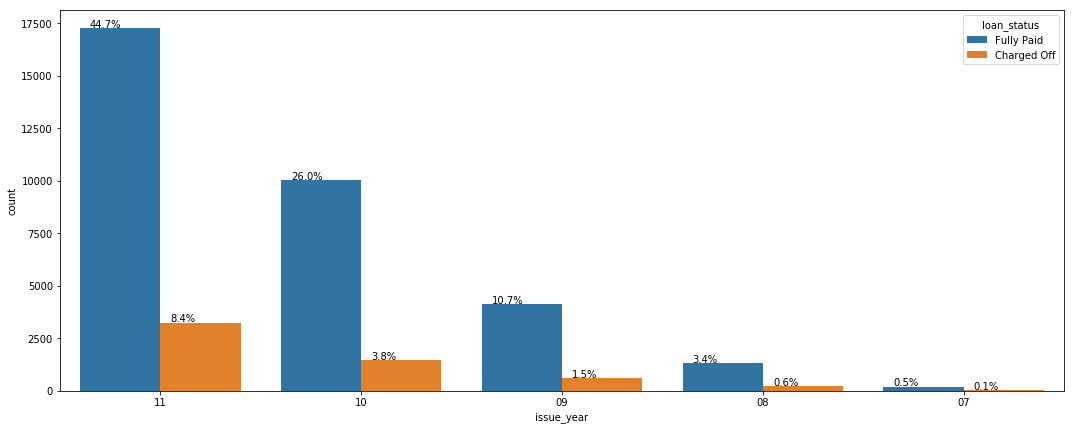

In [30]:
#do_analysis_categorical(lending_club, 'issue_year')
# df=lending_club
# col='issue_year'

hue='loan_status'
temp = pd.Series(data = hue)
fig, ax = plt.subplots()
width = 18
fig.set_size_inches(width , 7)
ax = sns.countplot(data = lending_club, x= 'issue_year', order=lending_club['issue_year'].value_counts().index,hue = 'loan_status') 
if len(temp.unique()) > 0:
    for p in ax.patches:
        ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(lending_club))), (p.get_x()+0.05, p.get_height()+20))  
else:
    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
    del temp

In [31]:
hue='loan_status'
temp = pd.Series(data = hue)
fig, ax = plt.subplots()
width = 10
fig.set_size_inches(width , 7)
ax = sns.countplot(data = lending_club, x= 'issue_month', order=lending_club['issue_month'].value_counts().index,hue = 'loan_status') 
#if len(temp.unique()) > 0:
for p in ax.patches:
 ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(lending_club))), (p.get_x()+0.05, p.get_height()+20))  
 else:
    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
del temp

SyntaxError: invalid syntax (<ipython-input-31-d32e8728e8e1>, line 10)

In [ ]:
Insights:
1.About 18 % of Loans that were issued in month of Dec were Charged Off which is highest compared to that of all other months.
2.Only about 8% of all the loans issued in Jan Charged Off which is lowest compared to that of all other months.

In [32]:
#====================earliest_cr_line============
#As it is earliest_cr_line will not give any insights need to used to dervie month and year .
lending_club['earliest_cr_line']
lending_club['earliestcrline_month']=lending_club['earliest_cr_line'].apply(lambda x:x.split('-')[0])
lending_club['earliestcrline_year']=lending_club['earliest_cr_line'].apply(lambda x:x.split('-')[1])
lending_club['earliestcrline_year'].apply(pd.to_numeric)

0        85
1        99
2         1
3        96
5         4
6         5
7         7
8         4
9         4
10       98
11       89
12        4
13        3
14       91
15        7
16       98
17       93
18        3
19        1
20       97
21       83
22       85
23        3
24        1
25        2
26        3
27        3
28       84
29        6
30       87
         ..
39687    95
39688    96
39689     4
39690    69
39691     3
39692     3
39693     2
39694    87
39695     0
39696     0
39697     3
39698    99
39699    95
39700    89
39701    92
39702    93
39703    97
39704     0
39705    97
39706    96
39707    95
39708    95
39709    96
39710    97
39711    94
39712    90
39713    86
39714    98
39715    88
39716     3
Name: earliestcrline_year, Length: 38577, dtype: int64

00    3160
99    2896
98    2773
01    2462
97    2387
96    2202
95    2078
94    1948
02    1890
03    1813
04    1727
05    1467
93    1460
06    1154
92    1029
90    1005
91     945
89     834
88     709
07     698
87     590
86     478
85     439
84     395
83     322
82     215
81     181
80     175
78     161
79     157
08     153
77     112
76      93
75      83
74      62
73      61
72      49
70      47
71      45
69      37
68      19
67      18
66      11
63      10
65       8
64       6
62       5
61       2
54       2
56       1
59       1
50       1
46       1
Name: earliestcrline_year, dtype: int64
loan_status          Charged Off  Fully Paid    All
earliestcrline_year                                
00                         500.0      2660.0   3160
01                         356.0      2106.0   2462
02                         255.0      1635.0   1890
03                         225.0      1588.0   1813
04                         229.0      1498.0   1727
05           

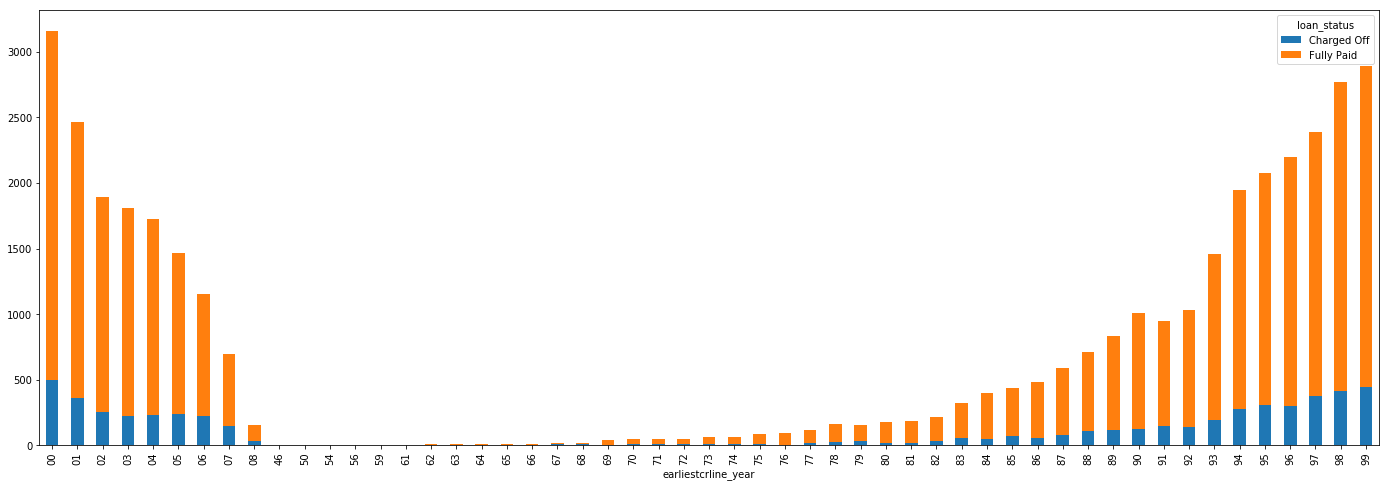

In [33]:
do_analysis_categorical(lending_club, 'earliestcrline_year')
#need to fill charged off as 0 when its nan in the pivot table


In [34]:
hue='loan_status'
temp = pd.Series(data = hue)
fig, ax = plt.subplots()
width = 18
fig.set_size_inches(width , 7)
ax = sns.countplot(data = lending_club, x= 'earliestcrline_year', order=lending_club['issue_year'].value_counts().index,hue = 'loan_status') 
if len(temp.unique()) > 0:
    for p in ax.patches:
        ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(lending_club))), (p.get_x()+0.05, p.get_height()+20))  
else:
    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
    del temp

/Users/r1divya/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/Users/r1divya/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


ValueError: cannot convert float NaN to integer

count    38577.000000
mean        22.052648
std         11.425861
min          2.000000
0%           2.000000
10%          9.000000
20%         12.000000
30.0%       15.000000
40%         18.000000
50%         20.000000
60.0%       23.000000
70%         27.000000
80%         31.000000
90%         38.000000
100%        90.000000
max         90.000000
Name: total_acc, dtype: float64
Number of null values for the column total_acc : 0


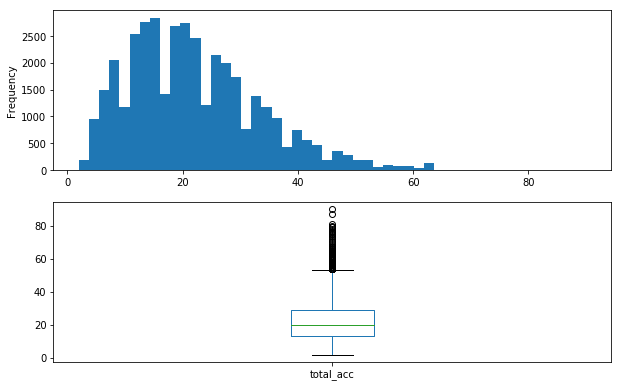

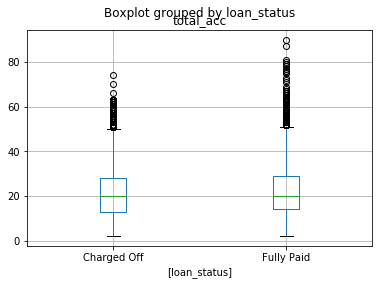

In [35]:
do_analysis(lending_club, 'total_acc')

In [36]:
lending_club['Ration_Open_Total_acc']=(lending_club['open_acc']/lending_club['total_acc'])*100

count    38577.000000
mean        47.087334
std         18.664810
min          5.128205
0%           5.128205
10%         25.000000
20%         30.769231
30.0%       35.483871
40%         40.000000
50%         44.444444
60.0%       50.000000
70%         55.000000
80%         62.500000
90%         73.333333
100%       175.000000
max        175.000000
Name: Ration_Open_Total_acc, dtype: float64
Number of null values for the column Ration_Open_Total_acc : 0


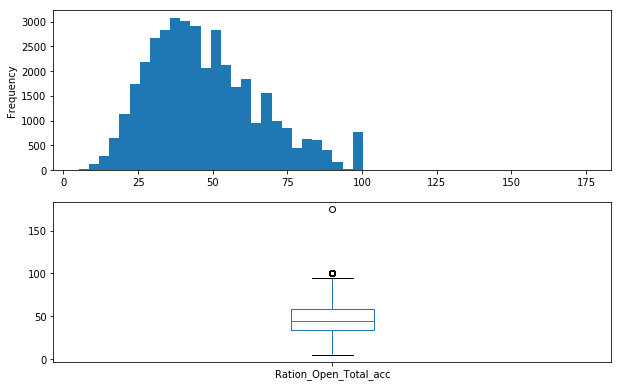

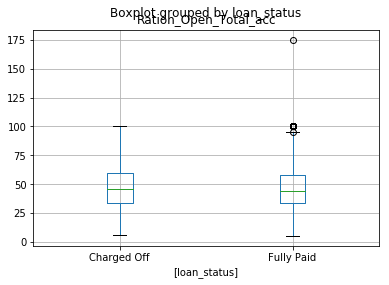

In [37]:
do_analysis(lending_club, 'Ration_Open_Total_acc')

In [ ]:
Insights :
     1.out of 38577 profiles : around 1000 have the open_acc/total_acc ration as 100% ie all loans are either Current/ChargedOff
     These profiles should never be considered for next loan request
     2. Also check 75% and above cases 

In [38]:
lending_club['out_prncp_inv']

0        0.0
1        0.0
2        0.0
3        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
30       0.0
        ... 
39687    0.0
39688    0.0
39689    0.0
39690    0.0
39691    0.0
39692    0.0
39693    0.0
39694    0.0
39695    0.0
39696    0.0
39697    0.0
39698    0.0
39699    0.0
39700    0.0
39701    0.0
39702    0.0
39703    0.0
39704    0.0
39705    0.0
39706    0.0
39707    0.0
39708    0.0
39709    0.0
39710    0.0
39711    0.0
39712    0.0
39713    0.0
39714    0.0
39715    0.0
39716    0.0
Name: out_prncp_inv, Length: 38577, dtype: float64

In [ ]:
lending_club['acc_now_delinq'].

In [ ]:
lending_club['acc_now_delinq'].value_counts()

0.0    38577
Name: out_prncp_inv, dtype: int64
loan_status    Charged Off  Fully Paid    All
out_prncp_inv                                
0.0                   5627       32950  38577
All                   5627       32950  38577


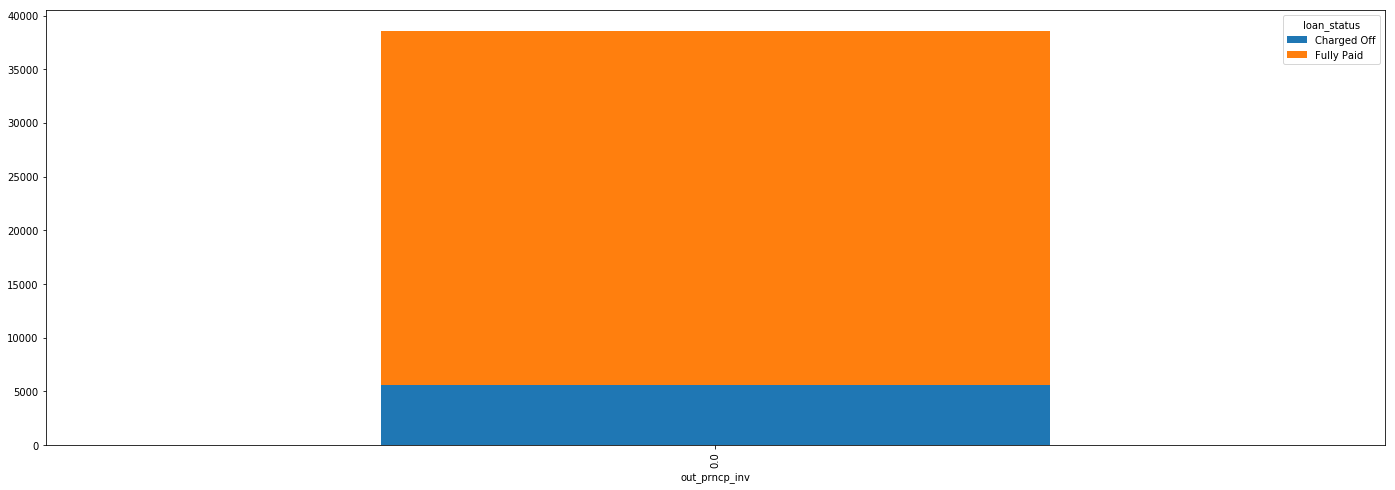

In [40]:
###################out_prncp_inv##################
do_analysis_categorical(lending_club, 'out_prncp_inv')

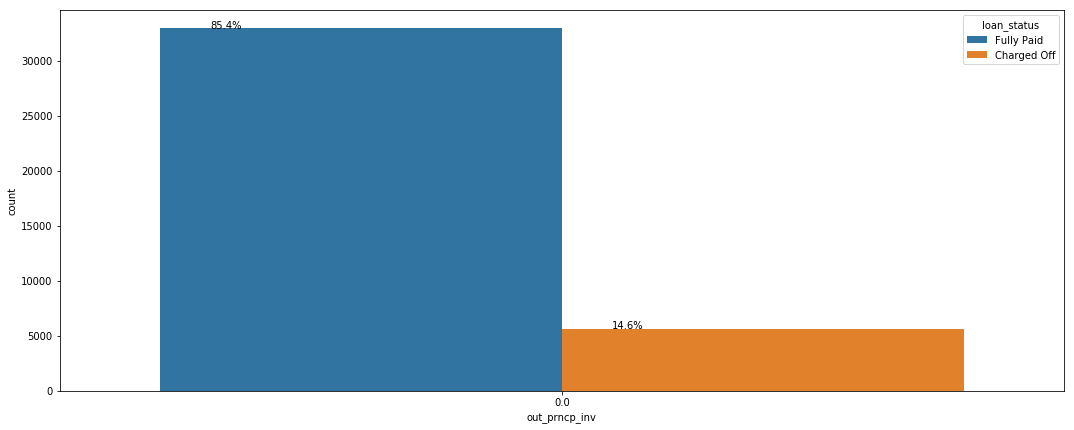

In [41]:
hue='loan_status'
temp = pd.Series(data = hue)
fig, ax = plt.subplots()
width = 18
fig.set_size_inches(width , 7)
ax = sns.countplot(data = lending_club, x= 'out_prncp_inv', order=lending_club['out_prncp_inv'].value_counts().index,hue = 'loan_status') 
if len(temp.unique()) > 0:
    for p in ax.patches:
        ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(lending_club))), (p.get_x()+0.05, p.get_height()+20))  
else:
    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
    del temp

In [ ]:
Insights: Only 14.6% outstanding Prnc is remaining  for Charged off Vs 85.4% of outstanding remaing for Fully paid.
    #======================end of out_prncp_inv=================

In [44]:
   #======================end of =================
lending_club.zip_code.value_counts()


100xx    583
945xx    531
112xx    502
606xx    493
070xx    455
900xx    446
300xx    383
021xx    383
926xx    366
750xx    356
941xx    355
921xx    341
917xx    340
331xx    337
770xx    316
117xx    293
113xx    274
852xx    267
913xx    265
330xx    249
891xx    242
080xx    235
925xx    232
902xx    229
334xx    229
201xx    223
920xx    221
951xx    219
980xx    217
303xx    217
        ... 
471xx      1
772xx      1
884xx      1
378xx      1
332xx      1
747xx      1
734xx      1
677xx      1
834xx      1
965xx      1
473xx      1
663xx      1
252xx      1
375xx      1
408xx      1
353xx      1
523xx      1
469xx      1
289xx      1
823xx      1
388xx      1
266xx      1
090xx      1
414xx      1
479xx      1
044xx      1
248xx      1
556xx      1
096xx      1
369xx      1
Name: zip_code, Length: 822, dtype: int64

100xx    583
945xx    531
112xx    502
606xx    493
070xx    455
900xx    446
300xx    383
021xx    383
926xx    366
750xx    356
941xx    355
921xx    341
917xx    340
331xx    337
770xx    316
117xx    293
113xx    274
852xx    267
913xx    265
330xx    249
891xx    242
080xx    235
925xx    232
902xx    229
334xx    229
201xx    223
920xx    221
951xx    219
980xx    217
303xx    217
        ... 
471xx      1
772xx      1
884xx      1
378xx      1
332xx      1
747xx      1
734xx      1
677xx      1
834xx      1
965xx      1
473xx      1
663xx      1
252xx      1
375xx      1
408xx      1
353xx      1
523xx      1
469xx      1
289xx      1
823xx      1
388xx      1
266xx      1
090xx      1
414xx      1
479xx      1
044xx      1
248xx      1
556xx      1
096xx      1
369xx      1
Name: zip_code, Length: 822, dtype: int64
loan_status  Charged Off  Fully Paid    All
zip_code                                   
007xx                NaN         1.0      1
010xx               14.0        8

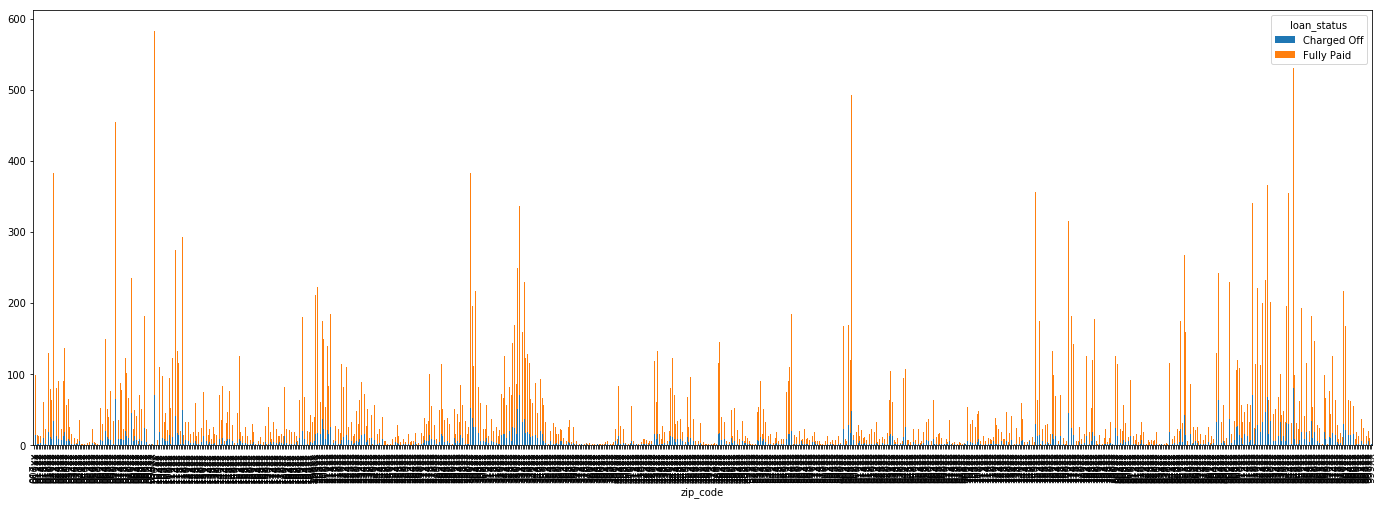

In [45]:
do_analysis_categorical(lending_club, 'zip_code')


56